# Linear Regression

In [1]:
%matplotlib inline
import numpy as np
from cross_validation import cross_validation
from polynomial import build_poly
import matplotlib.pyplot as plt

In [2]:
X_train = np.load("X_train_normalized.npy")
y_train = np.load("y_train_1-1.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 14)
(250000,)


# Splitting into 3 subsets

We split the dataset using PRI_jet_num column

In [3]:
X_pri_0 = X_train[(X_train[:, -2] == 0), :]
X_pri_1 = X_train[(X_train[:, -2] == 1), :]
X_pri_23 = X_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3), :]

y_pri_0 = y_train[(X_train[:, -2] == 0)]
y_pri_1 = y_train[(X_train[:, -2] == 1)]
y_pri_23 = y_train[(X_train[:, -2] == 2) | (X_train[:, -2] == 3)]

In [4]:
X_pri_0 = np.delete(X_pri_0, np.s_[12], axis=1)
X_pri_1 = np.delete(X_pri_1, np.s_[12], axis=1)
X_pri_23 = np.delete(X_pri_23, np.s_[12], axis=1)

print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

print("\ny_PRI_0: {}".format(y_pri_0.shape))
print("y_PRI_1: {}".format(y_pri_1.shape))
print("y_PRI_23: {}".format(y_pri_23.shape))

PRI_0: (99913, 13)
PRI_1: (77544, 13)
PRI_23: (72543, 13)

y_PRI_0: (99913,)
y_PRI_1: (77544,)
y_PRI_23: (72543,)


In [5]:
selected_features = np.array([1,3,9,10,11,13,21,23])
selected_features = np.sort(np.append(selected_features, [0,4,5,6,12]))
print(selected_features)

[ 0  1  3  4  5  6  9 10 11 12 13 21 23]


In [6]:
delete_columns_0 = []

for i in range(X_pri_0.shape[1]):
    if np.isin(True, (X_pri_0[:,i] == -999)):
        delete_columns_0.append(i)
        
delete_columns_0

[3, 4, 5, 9, 12]

In [7]:
delete_columns_1 = []

for i in range(X_pri_1.shape[1]):
    if np.isin(True, (X_pri_1[:,i] == -999)):
        delete_columns_1.append(i)
        
delete_columns_1

[3, 4, 5, 9]

In [8]:
X_pri_0 = np.delete(X_pri_0, np.s_[delete_columns_0], axis=1)  
X_pri_0.shape

(99913, 8)

In [9]:
X_pri_1 = np.delete(X_pri_1, np.s_[delete_columns_1], axis=1)  
X_pri_1.shape

(77544, 9)

In [10]:
print("PRI_0: {}".format(X_pri_0.shape))
print("PRI_1: {}".format(X_pri_1.shape))
print("PRI_23: {}".format(X_pri_23.shape))

PRI_0: (99913, 8)
PRI_1: (77544, 9)
PRI_23: (72543, 13)


## Model training

Degrees are selected in accordance with the results in Least Squares with Normal Equations.

### Training for PRI_0 subset

Optimum degree = 10

In [11]:
degrees = [10]
max_iter = [1000]
gamma = np.logspace(-6,-1,6)
print(gamma)
pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


In [12]:
pri0_tr_acc, pri0_te_acc = cross_validation(y_pri_0, X_pri_0, 3, h_pars=pars, model='linear')

deg:10-itr:1000-gam:1e-06 completed
deg:10-itr:1000-gam:1e-05 completed
deg:10-itr:1000-gam:0.0001 completed
deg:10-itr:1000-gam:0.001 completed
deg:10-itr:1000-gam:0.01 completed
deg:10-itr:1000-gam:0.1 completed


In [13]:
pri0_te_acc

array([[1.00000000e+03, 1.00000000e-06, 1.00000000e+01, 7.44855473e-01],
       [1.00000000e+03, 1.00000000e-05, 1.00000000e+01, 7.44855473e-01],
       [1.00000000e+03, 1.00000000e-04, 1.00000000e+01, 7.44855473e-01],
       [1.00000000e+03, 1.00000000e-03, 1.00000000e+01, 7.44375050e-01],
       [1.00000000e+03, 1.00000000e-02, 1.00000000e+01, 7.37829290e-01],
       [1.00000000e+03, 1.00000000e-01, 1.00000000e+01, 7.59368244e-01]])

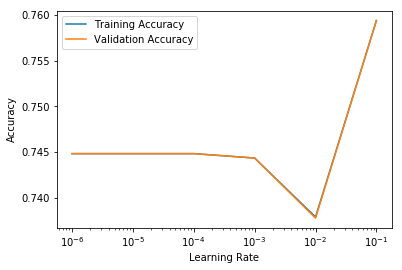

In [14]:
plt.plot(pri0_tr_acc[:,1], pri0_tr_acc[:,3], label='Training Accuracy')
plt.plot(pri0_te_acc[:,1], pri0_te_acc[:,3], label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [24]:
from implementationsentationsentations import least_squares_GD

In [21]:
degrees = [10]
max_iter = [10000]
gamma = [1e-2]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [22]:
pri0_tr_acc, pri0_te_acc = cross_validation(y_pri_0, X_pri_0, 3, h_pars=pars, model='linear')

deg:10-itr:10000-gam:0.01 completed


In [27]:
pri0_te_acc[0,3]

0.7593682440547681

In [25]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_0, 10).shape[1]).reshape(-1,1)#

w, losses = least_squares_GD(y_pri_0, build_poly(X_pri_0,10), initial_w, 10000, 1e-2)

Text(0,0.5,'Mean Squared Loss')

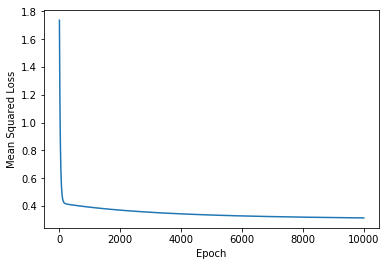

In [28]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Loss')

### Training for PRI_1 subset

Optimum degree = 9

In [15]:
degrees = [9]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, X_pri_1, 3, h_pars=pars, model='linear')

deg:9-itr:1000-gam:1e-06 completed
deg:9-itr:1000-gam:1e-05 completed
deg:9-itr:1000-gam:0.0001 completed
deg:9-itr:1000-gam:0.001 completed
deg:9-itr:1000-gam:0.01 completed
deg:9-itr:1000-gam:0.1 completed


In [16]:
pri1_te_acc

array([[1.00000000e+03, 1.00000000e-06, 9.00000000e+00, 3.61007944e-01],
       [1.00000000e+03, 1.00000000e-05, 9.00000000e+00, 3.60762922e-01],
       [1.00000000e+03, 1.00000000e-04, 9.00000000e+00, 3.59679666e-01],
       [1.00000000e+03, 1.00000000e-03, 9.00000000e+00, 3.53102755e-01],
       [1.00000000e+03, 1.00000000e-02, 9.00000000e+00, 6.26147735e-01],
       [1.00000000e+03, 1.00000000e-01, 9.00000000e+00, 6.96095120e-01]])

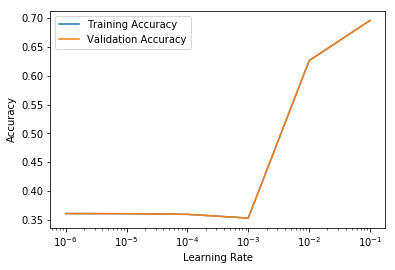

In [17]:
plt.plot(pri1_tr_acc[:,1], pri1_tr_acc[:,3], label='Training Accuracy')
plt.plot(pri1_te_acc[:,1], pri1_te_acc[:,3], label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [29]:
degrees = [9]
max_iter = [10000]
gamma = [1e-1]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [30]:
pri1_tr_acc, pri1_te_acc = cross_validation(y_pri_1, X_pri_1, 3, h_pars=pars, model='linear')

deg:9-itr:10000-gam:0.1 completed


In [31]:
pri1_te_acc[0,3]

0.7088104817909832

In [32]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_1, 9).shape[1]).reshape(-1,1)#
w, losses = least_squares_GD(y_pri_1, build_poly(X_pri_1,9), initial_w, 10000, 1e-1)

Text(0,0.5,'Mean Squared Loss')

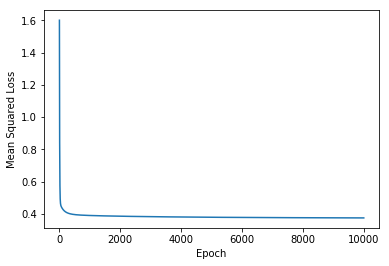

In [33]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Loss')

### Training for PRI_23 subset

Optimum degree = 10

In [18]:
degrees = [10]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, X_pri_23, 3, h_pars=pars, model='linear')

deg:10-itr:1000-gam:1e-06 completed
deg:10-itr:1000-gam:1e-05 completed
deg:10-itr:1000-gam:0.0001 completed
deg:10-itr:1000-gam:0.001 completed
deg:10-itr:1000-gam:0.01 completed
deg:10-itr:1000-gam:0.1 completed


In [19]:
pri23_te_acc

array([[1.00000000e+03, 1.00000000e-06, 1.00000000e+01, 5.07919441e-01],
       [1.00000000e+03, 1.00000000e-05, 1.00000000e+01, 5.17072633e-01],
       [1.00000000e+03, 1.00000000e-04, 1.00000000e+01, 5.63569193e-01],
       [1.00000000e+03, 1.00000000e-03, 1.00000000e+01, 6.31142908e-01],
       [1.00000000e+03, 1.00000000e-02, 1.00000000e+01, 6.86227479e-01],
       [1.00000000e+03, 1.00000000e-01, 1.00000000e+01, 7.08669341e-01]])

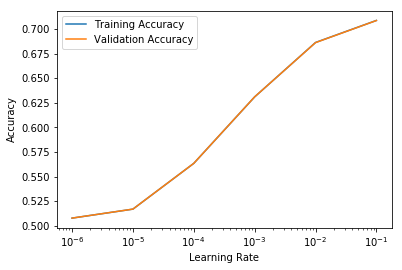

In [20]:
plt.plot(pri23_tr_acc[:,1], pri23_tr_acc[:,3], label='Training Accuracy')
plt.plot(pri23_te_acc[:,1], pri23_te_acc[:,3], label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()

In [34]:
degrees = [10]
max_iter = [10000]
gamma = [1e-1]

pars = {'degrees': degrees,
       'max_iter': max_iter,
       'gamma': gamma}

In [35]:
pri23_tr_acc, pri23_te_acc = cross_validation(y_pri_23, X_pri_23, 3, h_pars=pars, model='linear')

deg:10-itr:10000-gam:0.1 completed


In [36]:
pri23_te_acc[0,3]

0.7269068001047655

In [37]:
np.random.seed(23)
initial_w = np.random.normal(0,1,build_poly(X_pri_23, 10).shape[1]).reshape(-1,1)#
w, losses = least_squares_GD(y_pri_23, build_poly(X_pri_23,10), initial_w, 10000, 1e-1)

Text(0,0.5,'Mean Squared Loss')

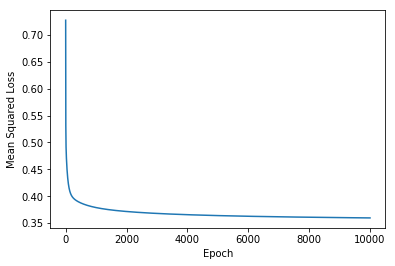

In [38]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Loss')

# Linear Regression GD - Validation Set Accuracy

In [39]:
np.mean([pri23_te_acc[0,3],
        pri1_te_acc[0,3],
        pri0_te_acc[0,3]])

0.7316951753168389